In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

In [2]:
# Load the Annual Premium data - train & test data

CS_Train = pd.read_csv(r"C:\Users\Admin\Downloads\Raju Sir DLS\Docs\CSP_Files\cs_train_Ann Premium.csv", header=0)
CS_Test = pd.read_csv(r"C:\Users\Admin\Downloads\Raju Sir DLS\Docs\CSP_Files\cs_test_Ann Premium.csv", header=0)
CS_Train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Response,Annual_Premium
0,1,Male,44,1,28,0,> 2 Years,Yes,26,217,1,40454
1,2,Male,76,1,3,0,1-2 Year,No,26,183,0,33536
2,3,Male,47,1,28,0,> 2 Years,Yes,26,27,1,38294
3,4,Male,21,1,11,1,< 1 Year,No,152,203,0,28619
4,5,Female,29,1,41,1,< 1 Year,No,152,39,0,27496


In [3]:
# Find missing values in the train dataset if any

CS_Train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
Annual_Premium          0
dtype: int64

In [4]:
# Find missing values in the test dataset if any

CS_Test.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Policy_Sales_Channel    0
Vintage                 0
Annual_Premium          0
dtype: int64

In [5]:
# display the Dataset description

CS_Train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Policy_Sales_Channel,Vintage,Response,Annual_Premium
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,112.034295,154.347397,0.122563,30564.389581
std,110016.836208,15.511611,0.046110,13.229888,0.498251,54.203995,83.671304,0.327936,17213.155057
min,1.000000,20.000000,0.000000,0.000000,0.000000,1.000000,10.000000,0.000000,2630.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,29.000000,82.000000,0.000000,24405.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,133.000000,154.000000,0.000000,31669.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,152.000000,227.000000,0.000000,39400.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,163.000000,299.000000,1.000000,540165.000000


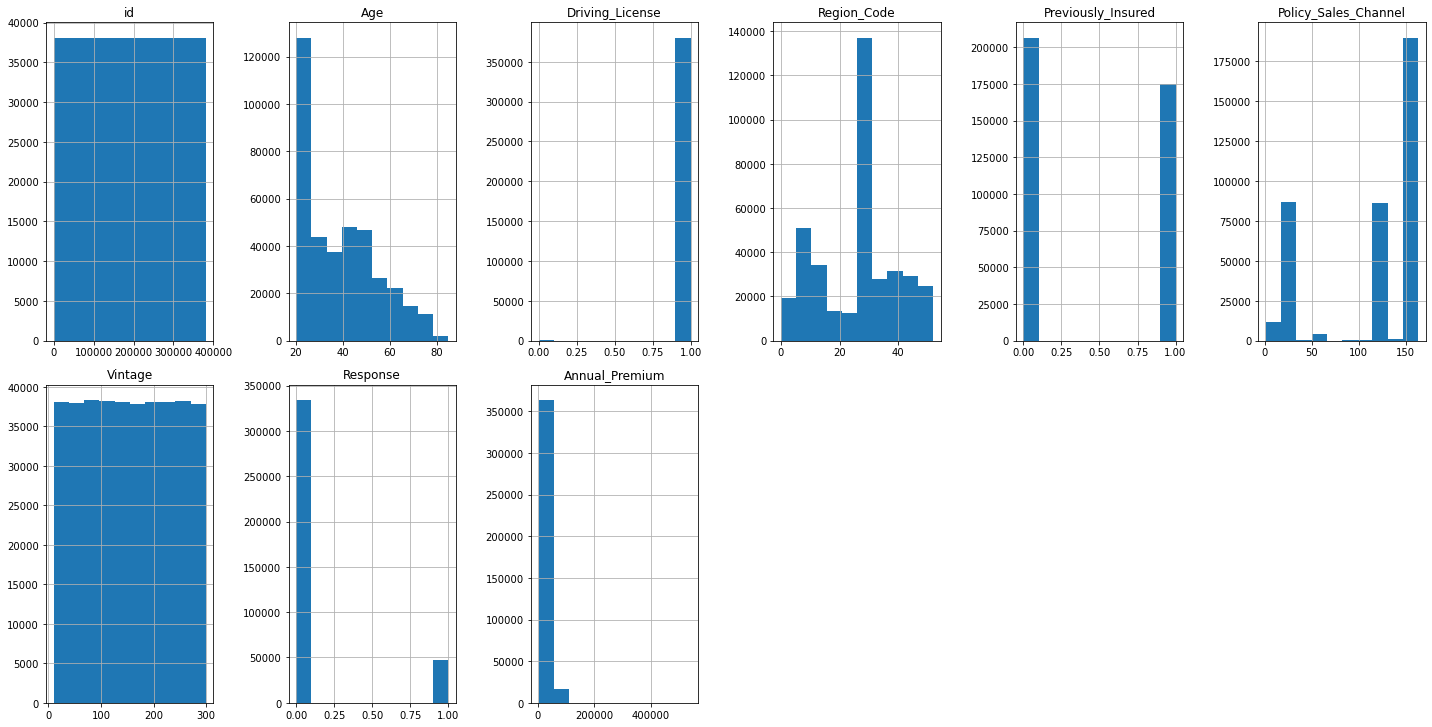

In [6]:
# Plot a histogram for each numerical variable and analyze the distribution

CS_Train.hist(figsize=(20,15),layout=(3,6))
plt.tight_layout()
plt.show()

In [7]:
# Copy files to back files

CS_Train_BK = CS_Train.copy()
CS_Test_BK = CS_Test.copy()

In [8]:
# Drop the Driving_License bco it is unbalanced ratio between the labels

CS_Train.drop('Driving_License',axis=1,inplace=True)
CS_Test.drop('Driving_License',axis=1,inplace=True)

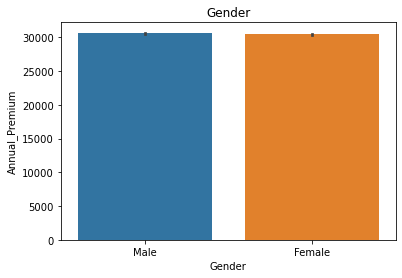

In [9]:
#Numerical and Categorical variables analysis
## Gender vs Annual Premium

sns.barplot(x='Gender',y='Annual_Premium',data=CS_Train)
plt.title('Gender')
plt.show()

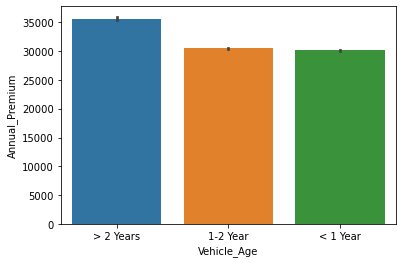

In [10]:
# Vehicle_Age vs Annual Premium

sns.barplot(x='Vehicle_Age',y='Annual_Premium',data=CS_Train)
plt.show()

In [11]:
CS_Train.shape

(381109, 11)

In [12]:
CS_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    381109 non-null  int64 
 1   Gender                381109 non-null  object
 2   Age                   381109 non-null  int64 
 3   Region_Code           381109 non-null  int64 
 4   Previously_Insured    381109 non-null  int64 
 5   Vehicle_Age           381109 non-null  object
 6   Vehicle_Damage        381109 non-null  object
 7   Policy_Sales_Channel  381109 non-null  int64 
 8   Vintage               381109 non-null  int64 
 9   Response              381109 non-null  int64 
 10  Annual_Premium        381109 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 32.0+ MB


In [13]:
# Data Cleaning - Gender by using map() function

gender_map={'Male':0,'Female':1}
CS_Train['Gender']=CS_Train['Gender'].map(gender_map)
CS_Test['Gender']=CS_Test['Gender'].map(gender_map)

In [14]:
# Data Cleaning - Vehicle_Age by using map() function

vehicle_age_map={'1-2 Year':0,'< 1 Year':1,'> 2 Years':2}
CS_Train['Vehicle_Age']=CS_Train['Vehicle_Age'].map(vehicle_age_map)
CS_Test['Vehicle_Age']=CS_Test['Vehicle_Age'].map(vehicle_age_map)

In [15]:
# Data Cleaning - Vehicle_Damage by using map() function

Vehicle_Damage_map={'Yes':0,'No':1}
CS_Train['Vehicle_Damage']=CS_Train['Vehicle_Damage'].map(Vehicle_Damage_map)
CS_Test['Vehicle_Damage']=CS_Test['Vehicle_Damage'].map(Vehicle_Damage_map)

In [16]:
CS_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   id                    381109 non-null  int64
 1   Gender                381109 non-null  int64
 2   Age                   381109 non-null  int64
 3   Region_Code           381109 non-null  int64
 4   Previously_Insured    381109 non-null  int64
 5   Vehicle_Age           381109 non-null  int64
 6   Vehicle_Damage        381109 non-null  int64
 7   Policy_Sales_Channel  381109 non-null  int64
 8   Vintage               381109 non-null  int64
 9   Response              381109 non-null  int64
 10  Annual_Premium        381109 non-null  int64
dtypes: int64(11)
memory usage: 32.0 MB


In [17]:
CS_Train.head()

,id,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Response,Annual_Premium
0,1,0,44,28,0,2,0,26,217,1,40454
1,2,0,76,3,0,0,1,26,183,0,33536
2,3,0,47,28,0,2,0,26,27,1,38294
3,4,0,21,11,1,1,1,152,203,0,28619
4,5,1,29,41,1,1,1,152,39,0,27496


In [18]:
CS_Test.head()

,id,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Annual_Premium
0,381110,0,25,11,1,1,1,152,53,35786
1,381111,0,40,28,0,0,0,7,111,33762
2,381112,0,47,28,0,0,0,124,199,40050
3,381113,0,24,27,1,1,0,152,187,37356
4,381114,0,27,28,1,1,1,152,297,59097


In [19]:
# Drop the id bcoz it is  unbalanced ratio between the labels

CS_Train.drop('id',axis=1,inplace=True)
CS_Test.drop('id',axis=1,inplace=True)

In [20]:
CS_Test.head()

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Annual_Premium
0,0,25,11,1,1,1,152,53,35786
1,0,40,28,0,0,0,7,111,33762
2,0,47,28,0,0,0,124,199,40050
3,0,24,27,1,1,0,152,187,37356
4,0,27,28,1,1,1,152,297,59097


In [21]:
CS_Train.head()

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Response,Annual_Premium
0,0,44,28,0,2,0,26,217,1,40454
1,0,76,3,0,0,1,26,183,0,33536
2,0,47,28,0,2,0,26,27,1,38294
3,0,21,11,1,1,1,152,203,0,28619
4,1,29,41,1,1,1,152,39,0,27496


In [23]:
# Identify the independent and Target variables

IndepVar = []
for col in CS_Train.columns:
    if col != 'Response':
        IndepVar.append(col)

TargetVar = 'Response'

x = CS_Train[IndepVar]
y = CS_Train[TargetVar]

In [24]:
# Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Confusion matrix : 
 [[     0  14138]
 [     0 100195]]
Outcome values : 
 0 14138 0 100195
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00     14138
           0       0.88      1.00      0.93    100195

    accuracy                           0.88    114333
   macro avg       0.44      0.50      0.47    114333
weighted avg       0.77      0.88      0.82    114333

Accuracy : 87.6 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


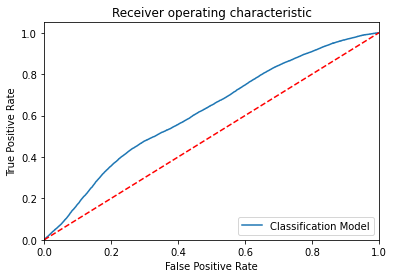

-----------------------------------------------------------------------------------------------------


In [27]:
# To build the 'Logistic Regression' model with random sampling

from sklearn.linear_model import LogisticRegression

ModelLR = LogisticRegression()

# Train the model with training dataset 

ModelLR.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelLR.predict(x_test)

# confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelLR.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')